## สร้างHovmoller diagramจาก Cappi2km ในวัน23เมย

* สร้าง Hovmoller diagram ของ 1 วัน จาก Cappi 2 km ด้วยการเฉลี่ยแบบมีเงื่อนไข ใช้ xarray ใน pyart เลย ไม่ต้องเซฟไฟล์ออกมาให้วุ่นวาย

#### เอกสารอ้างอิง
* แหล่งข้อมูลและโค้ดการ masking ใน pyart https://arm-doe.github.io/pyart/notebooks/masking_data_with_gatefilters.html
* โค้ดการเซฟradar object ออกไปใช้งาน https://arm-doe.github.io/pyart/notebooks/changing_fields_and_saving.html
* โค้ดการรวมไฟล์ nc เพื่อใช้งานการวิเคราะห์ time series https://neetinayak.medium.com/combine-many-netcdf-files-into-a-single-file-with-python-469ba476fc14
* โค้ดในยูทูป สาธิตการวิเคราะห์hovmoeller ด้วย xaaray https://www.youtube.com/watch?v=AuaW_CaOeF0 
* สร้าง cappi จาก erad 2022 https://openradarscience.org/erad2022/notebooks/pyart/exercice2_swiss_doppler.html
* สร้าง cappi จาก grid ของเวิร์คช้อป pyart https://github.com/openradar/AMS-Short-Course-on-Open-Source-Radar-Software/blob/master/7_Mapping_to_a_cartesian_grid.ipynb 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pyart
import cartopy.crs as ccrs
import cartopy
import xarray as xr
from datetime import datetime
from matplotlib.ticker import FormatStrFormatter


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



<frozen importlib._bootstrap>:283: DeprecationWarning: the load_module() method is deprecated and slated for removal in Python 3.12; use exec_module() instead
C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\mpl_toolkits\basemap\__init__.py:33: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _matplotlib_version = LooseVersion(_matplotlib_version)
C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\mpl_toolkits\basemap\__init__.py:34: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  _mpl_required_version = LooseVersion('0.98')


In [2]:
def grid2xr(radar):
    # ppi to grid
    lat = float(radar.latitude['data'])
    lon = float(radar.longitude['data'])
    alt = float(radar.altitude['data'])

    grids = pyart.map.grid_from_radars(
             radar, grid_shape=(46, 250, 250),
            grid_limits=((0, 15000.0),(-250000, 250000), (-250000, 250000)),
            fields=['corrected_reflectivity'], gridding_algo="map_gates_to_grid",
            weighting_function='BARNES')

    ds = grids.to_xarray()
    ds = ds['corrected_reflectivity'][:,6,:,:]
    return ds


In [3]:
# loop files and get it to list
path="./0data/0Hail_CRI23Apr2020/"
ls_ds=[]
i=0
for file in os.listdir(path):
    print(file) 
    fn = file[7:-3]   
    
    radar = pyart.io.read(path+file)
    fn = grid2xr(radar)
    ls_ds.append(fn)
    
    #if i==3 : 
     #   break
        
    i+=1
    print(i)
    
    
              

CRI240@202004230000.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


1
CRI240@202004230015.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


2
CRI240@202004230030.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


3
CRI240@202004230045.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


4
CRI240@202004230100.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


5
CRI240@202004230115.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


6
CRI240@202004230130.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


7
CRI240@202004230145.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


8
CRI240@202004230200.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


9
CRI240@202004230215.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


10
CRI240@202004230230.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


11
CRI240@202004230245.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


12
CRI240@202004230300.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


13
CRI240@202004230315.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


14
CRI240@202004230330.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


15
CRI240@202004230345.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


16
CRI240@202004230400.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


17
CRI240@202004230415.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


18
CRI240@202004230430.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


19
CRI240@202004230445.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


20
CRI240@202004230500.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


21
CRI240@202004230515.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


22
CRI240@202004230530.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


23
CRI240@202004230545.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


24
CRI240@202004230600.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


25
CRI240@202004230615.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


26
CRI240@202004230630.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


27
CRI240@202004230645.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


28
CRI240@202004230700.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


29
CRI240@202004230715.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


30
CRI240@202004230730.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


31
CRI240@202004230745.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


32
CRI240@202004230800.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


33
CRI240@202004230815.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


34
CRI240@202004230830.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


35
CRI240@202004230845.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


36
CRI240@202004230900.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


37
CRI240@202004230915.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


38
CRI240@202004230930.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


39
CRI240@202004230945.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


40
CRI240@202004231000.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


41
CRI240@202004231015.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


42
CRI240@202004231030.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


43
CRI240@202004231045.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


44
CRI240@202004231100.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


45
CRI240@202004231115.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


46
CRI240@202004231130.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


47
CRI240@202004231145.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


48
CRI240@202004231200.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


49
CRI240@202004231215.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


50
CRI240@202004231230.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


51
CRI240@202004231245.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


52
CRI240@202004231300.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


53
CRI240@202004231315.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


54
CRI240@202004231330.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


55
CRI240@202004231345.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


56
CRI240@202004231400.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


57
CRI240@202004231415.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


58
CRI240@202004231430.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


59
CRI240@202004231445.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


60
CRI240@202004231500.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


61
CRI240@202004231515.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


62
CRI240@202004231530.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


63
CRI240@202004231545.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


64
CRI240@202004231600.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


65
CRI240@202004231615.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


66
CRI240@202004231630.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


67
CRI240@202004231645.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


68
CRI240@202004231700.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


69
CRI240@202004231715.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


70
CRI240@202004231730.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


71
CRI240@202004231745.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


72
CRI240@202004231800.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


73
CRI240@202004231815.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


74
CRI240@202004231830.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


75
CRI240@202004231845.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


76
CRI240@202004231900.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


77
CRI240@202004231915.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


78
CRI240@202004231930.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


79
CRI240@202004231945.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


80
CRI240@202004232000.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


81
CRI240@202004232015.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


82
CRI240@202004232030.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


83
CRI240@202004232045.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


84
CRI240@202004232100.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


85
CRI240@202004232115.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


86
CRI240@202004232130.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


87
CRI240@202004232145.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


88
CRI240@202004232200.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


89
CRI240@202004232215.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


90
CRI240@202004232230.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


91
CRI240@202004232245.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


92
CRI240@202004232300.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


93
CRI240@202004232315.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


94
CRI240@202004232330.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


95
CRI240@202004232345.uf


C:\Users\Admin\anaconda3\envs\pyart\lib\site-packages\pyart\map\gates_to_grid.py:166: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990. Default will be switched to Barnes2 on June 1st.
  warnings.warn("Barnes weighting function is deprecated."


96


In [4]:
#ls_ds[3]

### รวม xarray ค่า cappi 2 km 96 ช่วงเวลาโดยใช้แกนเวลา

In [5]:
con_xr=xr.concat(ls_ds, dim="time")

### ตัวอย่างพลอต 1 ช่วงเวลา

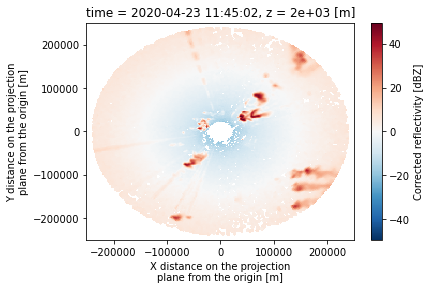

In [6]:
con_xr[47,:,:].plot()

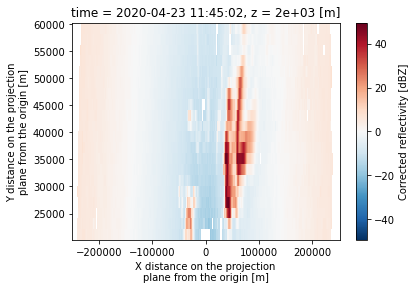

In [7]:
con_xr[47,135:155,:].plot()

### หาค่า mean time-y-axis แบบไม่กรองค่า dbz 

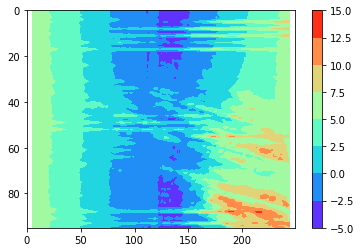

In [8]:
a = con_xr.groupby('time').mean(dim=( 'y'))
plt.contourf(a, cmap='rainbow')
plt.colorbar()
plt.gca().invert_yaxis()

### หาค่า mean time-y-axis แบบกรองค่า dbz 

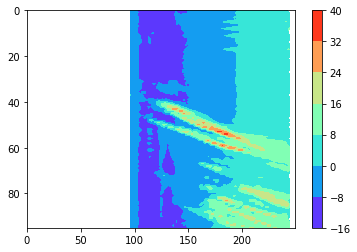

In [9]:
b = con_xr.where(con_xr.x+con_xr.y > 10)[:,135:155,:]
b = b.groupby('time').mean(dim=( 'y'), skipna=True) #หาmean
plt.contourf(b, cmap='rainbow')
plt.colorbar()
plt.gca().invert_yaxis()

## พลอตแบบ ใช้เงื่อนไข แบบ mean

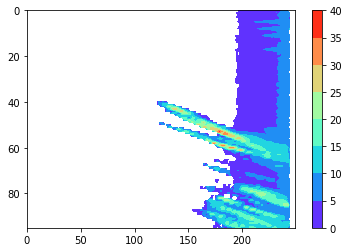

In [10]:
c = b.where((b > 0))
plt.contourf(c, cmap='rainbow')
plt.colorbar()
plt.gca().invert_yaxis()

In [11]:
c

<xarray.DataArray 'corrected_reflectivity' (time: 96, x: 250)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * time     (time) object 2020-04-23 00:00:02 ... 2020-04-23 23:45:01
    z        float64 2e+03
    lon      (x) float64 97.52 97.54 97.56 97.58 ... 102.2 102.2 102.2 102.2
  * x        (x) float64 -2.5e+05 -2.48e+05 -2.46e+05 ... 2.48e+05 2.5e+05
Attributes:
    units:          dBZ
    standard_name:  corrected_equivalent_reflectivity_factor
    long_name:      Corrected reflectivity
    coordinates:    elevation azimuth range
    _FillValue:     -9999.0

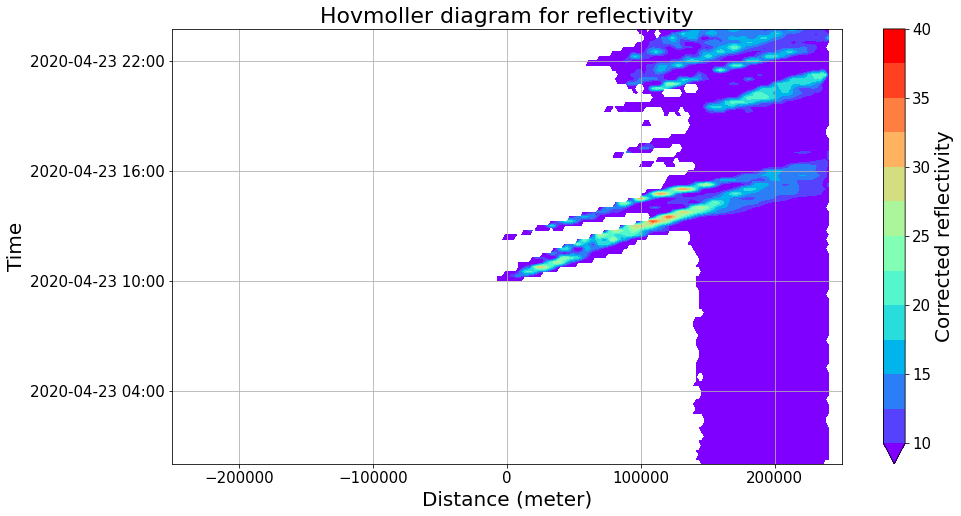

In [12]:
fg = xr.plot.contourf(c, cmap='rainbow', figsize=(15, 8), vmin=10, vmax=40, levels=13)
fg.axes.tick_params(labelsize=15)
fg.axes.set_title("Hovmoller diagram for reflectivity", fontsize=22)
fg.axes.set_ylabel("Time", fontsize=20)
fg.axes.set_xlabel("Distance (meter)", fontsize=20)
fg.colorbar.set_label("Corrected reflectivity", fontsize=20)
fg.colorbar.ax.tick_params(labelsize=15)
fg.axes.grid()
#set y tick spacing

## ขยายพลอตแบบ ใช้เงื่อนไข แบบ mean

In [13]:
cmn=c
cmn.isel(time=slice(None, None, -1))

<xarray.DataArray 'corrected_reflectivity' (time: 96, x: 250)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * time     (time) object 2020-04-23 23:45:01 ... 2020-04-23 00:00:02
    z        float64 2e+03
    lon      (x) float64 97.52 97.54 97.56 97.58 ... 102.2 102.2 102.2 102.2
  * x        (x) float64 -2.5e+05 -2.48e+05 -2.46e+05 ... 2.48e+05 2.5e+05
Attributes:
    units:          dBZ
    standard_name:  corrected_equivalent_reflectivity_factor
    long_name:      Corrected reflectivity
    coordinates:    elevation azimuth range
    _FillValue:     -9999.0

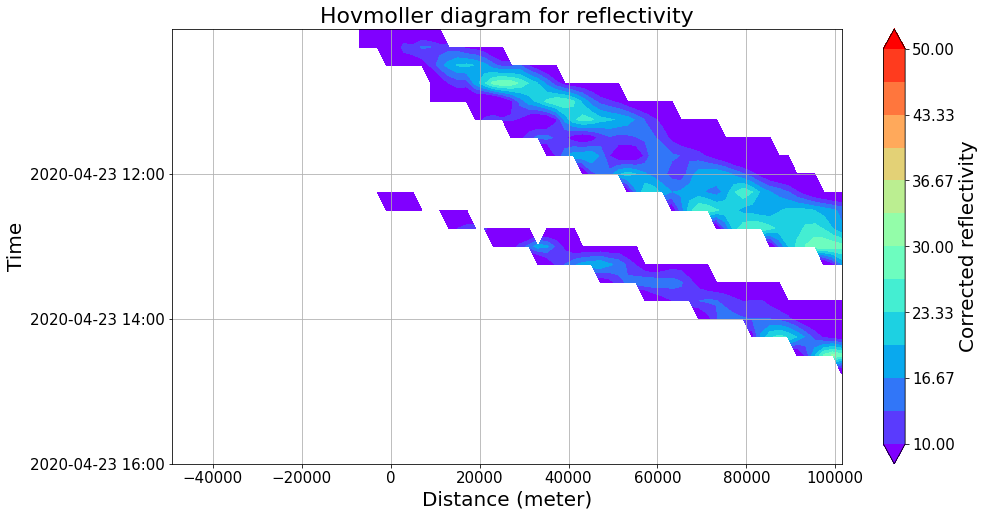

In [14]:
fg = xr.plot.contourf(cmn[40:65,100:176], cmap='rainbow', figsize=(15, 8), vmin=10, vmax=50, extend='both', levels=13)
fg.axes.tick_params(labelsize=15)
fg.axes.set_title("Hovmoller diagram for reflectivity", fontsize=22)
fg.axes.set_ylabel("Time", fontsize=20)
fg.axes.set_xlabel("Distance (meter)", fontsize=20)
fg.colorbar.set_label("Corrected reflectivity", fontsize=20)
fg.colorbar.ax.tick_params(labelsize=15)
fg.axes.invert_yaxis() #กลับด้านแกนy
fg.axes.grid()

In [15]:
dist_x=np.linspace(97.52213919, 102.24104657, 250)
dist_x

array([ 97.52213919,  97.54109063,  97.56004206,  97.5789935 ,
        97.59794493,  97.61689637,  97.6358478 ,  97.65479924,
        97.67375067,  97.69270211,  97.71165354,  97.73060498,
        97.74955641,  97.76850785,  97.78745928,  97.80641072,
        97.82536215,  97.84431359,  97.86326502,  97.88221646,
        97.9011679 ,  97.92011933,  97.93907077,  97.9580222 ,
        97.97697364,  97.99592507,  98.01487651,  98.03382794,
        98.05277938,  98.07173081,  98.09068225,  98.10963368,
        98.12858512,  98.14753655,  98.16648799,  98.18543942,
        98.20439086,  98.22334229,  98.24229373,  98.26124517,
        98.2801966 ,  98.29914804,  98.31809947,  98.33705091,
        98.35600234,  98.37495378,  98.39390521,  98.41285665,
        98.43180808,  98.45075952,  98.46971095,  98.48866239,
        98.50761382,  98.52656526,  98.54551669,  98.56446813,
        98.58341956,  98.602371  ,  98.62132244,  98.64027387,
        98.65922531,  98.67817674,  98.69712818,  98.71

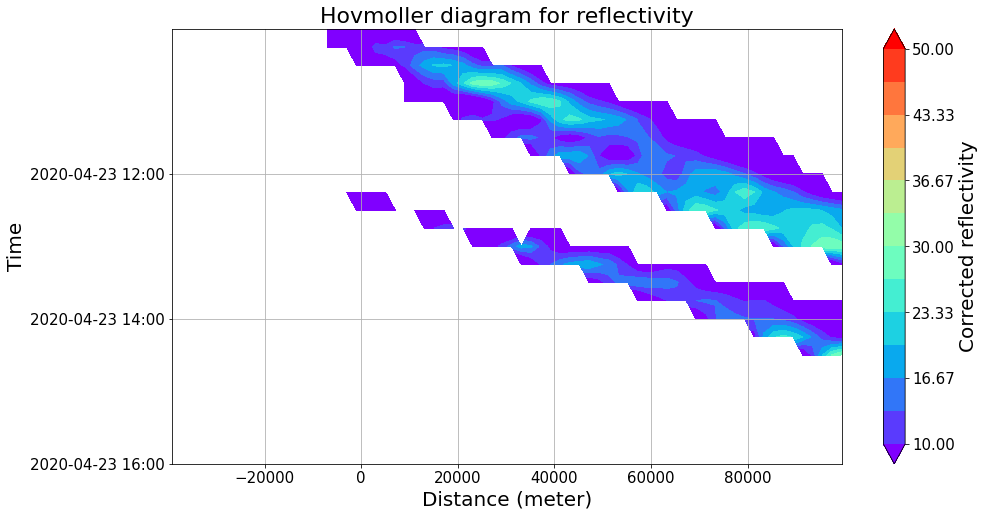

In [16]:
fg = xr.plot.contourf(cmn[40:65,105:175], cmap='rainbow', figsize=(15, 8), vmin=10, vmax=50, extend='both', levels=13)
fg.axes.tick_params(labelsize=15)
fg.axes.set_title("Hovmoller diagram for reflectivity", fontsize=22)
fg.axes.set_ylabel("Time", fontsize=20)
fg.axes.set_xlabel("Distance (meter)", fontsize=20)

fg.colorbar.set_label("Corrected reflectivity", fontsize=20)
fg.colorbar.ax.tick_params(labelsize=15)
fg.axes.invert_yaxis() #กลับด้านแกนy
fg.axes.grid()

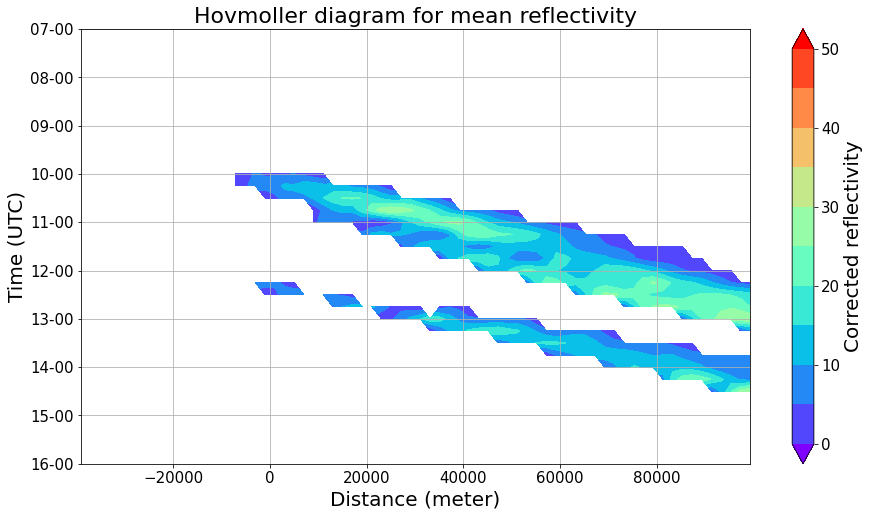

In [17]:
def strHour(timeArr):
    """แปลง cftime.Datetime ไปเป็น text"""
    return datetime.strptime(str(timeArr),'%Y-%m-%dT%H:%M:%S.%f000').strftime("%Y-%m-%d-%H-%M") [-5:]


timeArr=cmn['time'].values[28:65:4].astype("datetime64[ns]") #พลอตชั่วโมงเป็นtext
HourText=np.array(list(map(strHour, timeArr)))   


fg = xr.plot.contourf(cmn[28:65,105:175], cmap='rainbow', figsize=(15, 8), vmin=0, vmax=50, extend='both', levels=11)
fg.axes.tick_params(labelsize=15)
fg.axes.set_title("Hovmoller diagram for mean reflectivity", fontsize=22)
fg.axes.set_ylabel("Time (UTC)", fontsize=20)
fg.axes.set_xlabel("Distance (meter)", fontsize=20)
fg.colorbar.set_label("Corrected reflectivity", fontsize=20)
fg.colorbar.ax.tick_params(labelsize=15)
fg.axes.set_yticks(cmn['time'].values[28:65:4])
fg.axes.set_yticklabels(HourText)
fg.axes.invert_yaxis() #กลับด้านแกนy
fg.axes.grid()

## พลอต LST- local standard time 

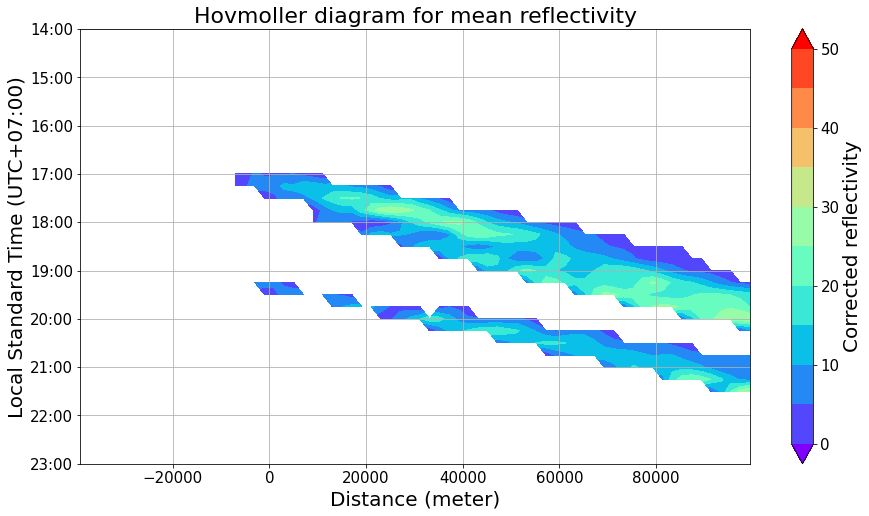

In [27]:
HourText_LST=np.array(['14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00',
       '21:00', '22:00', '23:00'], dtype='<U5')

def strHour(timeArr):
    """แปลง cftime.Datetime ไปเป็น text"""
    return datetime.strptime(str(timeArr),'%Y-%m-%dT%H:%M:%S.%f000').strftime("%Y-%m-%d-%H-%M") [-5:]


timeArr=cmn['time'].values[28:65:4].astype("datetime64[ns]") #พลอตชั่วโมงเป็นtext
HourText=np.array(list(map(strHour, timeArr)))   


fg = xr.plot.contourf(cmn[28:65,105:175], cmap='rainbow', figsize=(15, 8), vmin=0, vmax=50, extend='both', levels=11)
fg.axes.tick_params(labelsize=15)
fg.axes.set_title("Hovmoller diagram for mean reflectivity", fontsize=22)
fg.axes.set_ylabel("Local Standard Time (UTC+07:00)", fontsize=20)
fg.axes.set_xlabel("Distance (meter)", fontsize=20)
fg.colorbar.set_label("Corrected reflectivity", fontsize=20)
fg.colorbar.ax.tick_params(labelsize=15)
fg.axes.set_yticks(cmn['time'].values[28:65:4])
#fg.axes.set_yticklabels(HourText)
fg.axes.set_yticklabels(HourText_LST)
fg.axes.invert_yaxis() #กลับด้านแกนy
fg.axes.grid()

## พลอตแบบ ใช้เงื่อนไข max

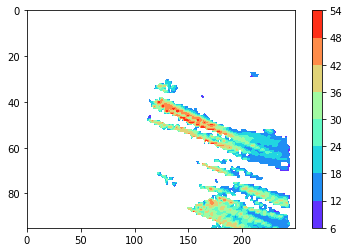

In [18]:
b = con_xr.where(con_xr.x+con_xr.y > 10)[:,135:155,:]
b = b.groupby('time').max(dim=( 'y'), skipna=True)
cmx = b.where((b > 10))
plt.contourf(cmx, cmap='rainbow')
plt.colorbar()
plt.gca().invert_yaxis()

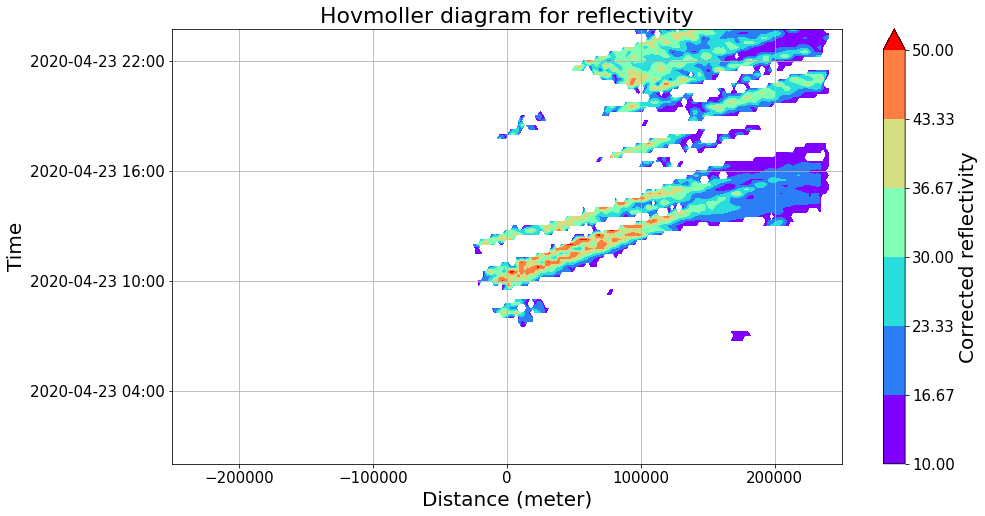

In [19]:
fg = xr.plot.contourf(cmx, cmap='rainbow', figsize=(15, 8), vmin=10, vmax=50)
fg.axes.tick_params(labelsize=15)
fg.axes.set_title("Hovmoller diagram for reflectivity", fontsize=22)
fg.axes.set_ylabel("Time", fontsize=20)
fg.axes.set_xlabel("Distance (meter)", fontsize=20)
fg.colorbar.set_label("Corrected reflectivity", fontsize=20)
fg.colorbar.ax.tick_params(labelsize=15)
fg.axes.grid()
#set y tick spacing

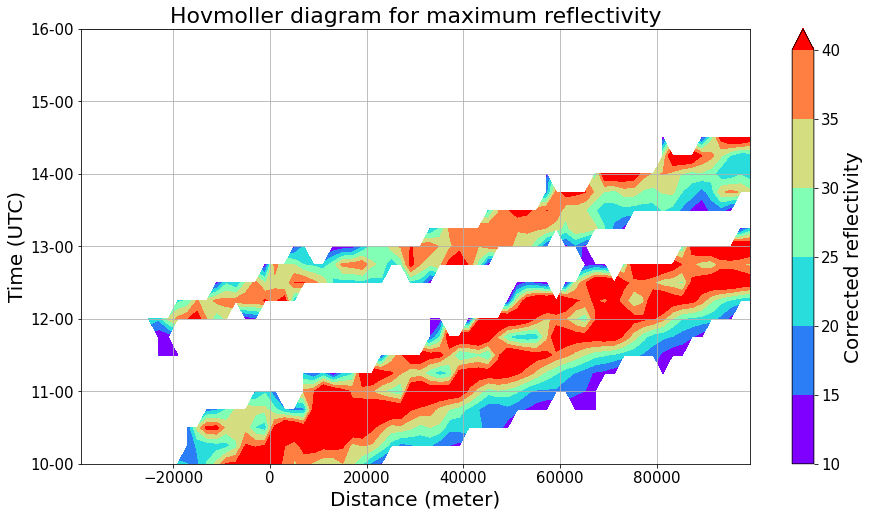

In [20]:
def strHour(timeArr):
    """แปลง cftime.Datetime ไปเป็น text"""
    return datetime.strptime(str(timeArr),'%Y-%m-%dT%H:%M:%S.%f000').strftime("%Y-%m-%d-%H-%M") [-5:]


timeArr=cmx['time'].values[40:65:4].astype("datetime64[ns]") #พลอตชั่วโมงเป็นtext
HourText=np.array(list(map(strHour, timeArr)))   


fg = xr.plot.contourf(cmx[40:65,105:175], cmap='rainbow', figsize=(15, 8), vmin=10, vmax=40)
fg.axes.tick_params(labelsize=15)
fg.axes.set_title("Hovmoller diagram for maximum reflectivity", fontsize=22)
fg.axes.set_ylabel("Time (UTC)", fontsize=20)
fg.axes.set_xlabel("Distance (meter)", fontsize=20)
fg.colorbar.set_label("Corrected reflectivity", fontsize=20)
fg.colorbar.ax.tick_params(labelsize=15)
fg.axes.set_yticks(cmx['time'].values[40:65:4])
fg.axes.set_yticklabels(HourText)
fg.axes.grid()

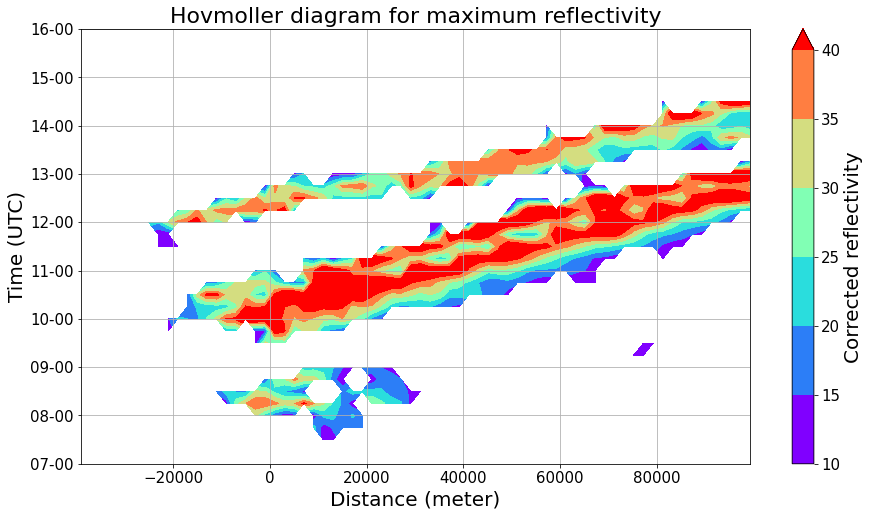

In [21]:
def strHour(timeArr):
    """แปลง cftime.Datetime ไปเป็น text"""
    return datetime.strptime(str(timeArr),'%Y-%m-%dT%H:%M:%S.%f000').strftime("%Y-%m-%d-%H-%M") [-5:]


timeArr=cmx['time'].values[28:65:4].astype("datetime64[ns]") #พลอตชั่วโมงเป็นtext
HourText=np.array(list(map(strHour, timeArr)))   


fg = xr.plot.contourf(cmx[28:65,105:175], cmap='rainbow', figsize=(15, 8), vmin=10, vmax=40)
fg.axes.tick_params(labelsize=15)
fg.axes.set_title("Hovmoller diagram for maximum reflectivity", fontsize=22)
fg.axes.set_ylabel("Time (UTC)", fontsize=20)
fg.axes.set_xlabel("Distance (meter)", fontsize=20)
fg.colorbar.set_label("Corrected reflectivity", fontsize=20)
fg.colorbar.ax.tick_params(labelsize=15)
fg.axes.set_yticks(cmx['time'].values[28:65:4])
fg.axes.set_yticklabels(HourText)
fg.axes.grid()

## ทดลอง invert แกน y จากชุดข้อมูล

In [22]:
cmx=cmx
cmx.isel(time=slice(None, None, -1))

<xarray.DataArray 'corrected_reflectivity' (time: 96, x: 250)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * time     (time) object 2020-04-23 23:45:01 ... 2020-04-23 00:00:02
    z        float64 2e+03
    lon      (x) float64 97.52 97.54 97.56 97.58 ... 102.2 102.2 102.2 102.2
  * x        (x) float64 -2.5e+05 -2.48e+05 -2.46e+05 ... 2.48e+05 2.5e+05
Attributes:
    units:          dBZ
    standard_name:  corrected_equivalent_reflectivity_factor
    long_name:      Corrected reflectivity
    coordinates:    elevation azimuth range
    _FillValue:     -9999.0

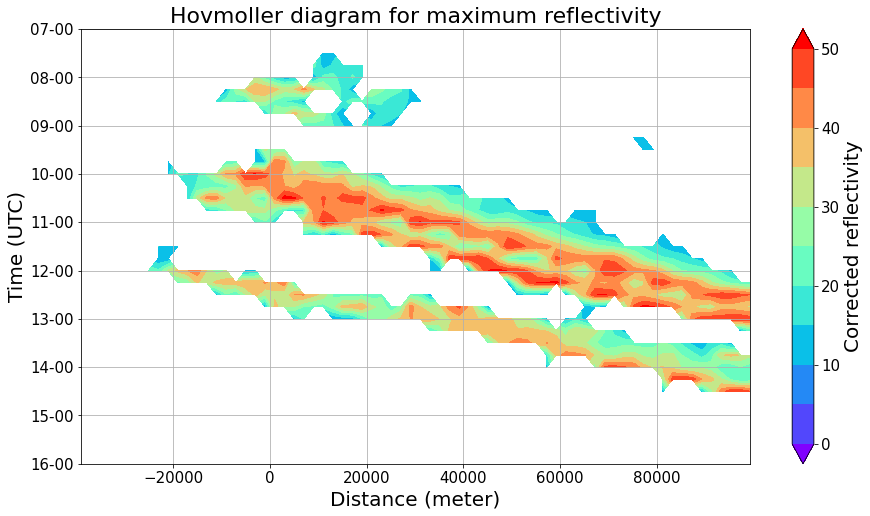

In [23]:
def strHour(timeArr):
    """แปลง cftime.Datetime ไปเป็น text"""
    return datetime.strptime(str(timeArr),'%Y-%m-%dT%H:%M:%S.%f000').strftime("%Y-%m-%d-%H-%M") [-5:]


timeArr=cmx['time'].values[28:65:4].astype("datetime64[ns]") #พลอตชั่วโมงเป็นtext
HourText=np.array(list(map(strHour, timeArr)))   


fg = xr.plot.contourf(cmx[28:65,105:175], cmap='rainbow', figsize=(15, 8), vmin=0, vmax=50, levels=11, extend='both',)
fg.axes.tick_params(labelsize=15)
fg.axes.set_title("Hovmoller diagram for maximum reflectivity", fontsize=22)
fg.axes.set_ylabel("Time (UTC)", fontsize=20)
fg.axes.set_xlabel("Distance (meter)", fontsize=20)
fg.colorbar.set_label("Corrected reflectivity", fontsize=20)
fg.colorbar.ax.tick_params(labelsize=15)
fg.axes.set_yticks(cmx['time'].values[28:65:4])
fg.axes.set_yticklabels(HourText)
fg.axes.invert_yaxis() #กลับด้านแกนy
fg.axes.grid()

### ส่วนเรื่อง dem profile ให้ต่อ dem ใน qgis เซฟเป็น netcdf แล้วอ่านเข้ามาใน xarray และทำการเฉลี่ยตามแกน y และพลอตด้วย matplotlib

## พลอต LST- local standard time 

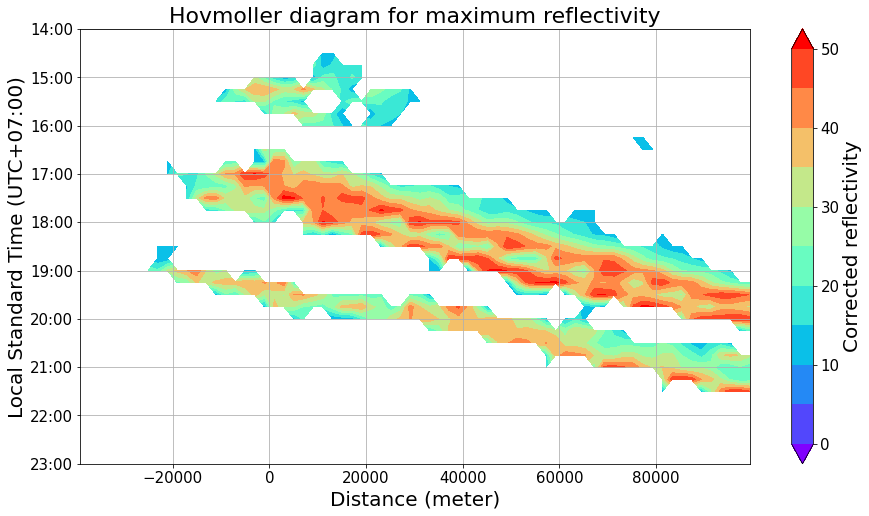

In [25]:
HourText_LST=np.array(['14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00',
       '21:00', '22:00', '23:00'], dtype='<U5')

def strHour(timeArr):
    """แปลง cftime.Datetime ไปเป็น text"""
    return datetime.strptime(str(timeArr),'%Y-%m-%dT%H:%M:%S.%f000').strftime("%Y-%m-%d-%H-%M") [-5:]


timeArr=cmx['time'].values[28:65:4].astype("datetime64[ns]") #พลอตชั่วโมงเป็นtext
HourText=np.array(list(map(strHour, timeArr))) #UTC

fg = xr.plot.contourf(cmx[28:65,105:175], cmap='rainbow', figsize=(15, 8), vmin=0, vmax=50, levels=11, extend='both',)
fg.axes.tick_params(labelsize=15)
fg.axes.set_title("Hovmoller diagram for maximum reflectivity", fontsize=22)
fg.axes.set_ylabel("Local Standard Time (UTC+07:00)", fontsize=20)
fg.axes.set_xlabel("Distance (meter)", fontsize=20)
fg.colorbar.set_label("Corrected reflectivity", fontsize=20)
fg.colorbar.ax.tick_params(labelsize=15)
fg.axes.set_yticks(cmx['time'].values[28:65:4])
fg.axes.set_yticklabels(HourText_LST)
#fg.axes.set_yticklabels(HourText)
fg.axes.invert_yaxis() #กลับด้านแกนy
fg.axes.grid()